C:\Users\Forry\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -78.897, ||grad|| = 104.21: 100%|██████████████████████████████████████████████| 38/38 [00:00<00:00, 846.68it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 159.60draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222E8358F60>,
      dtype=object)

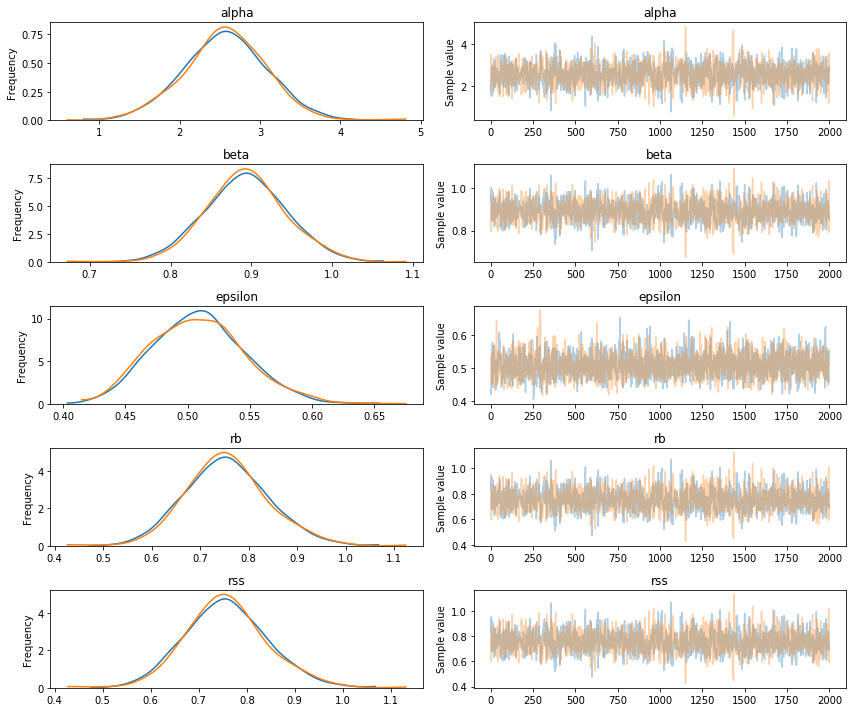

In [5]:
'''相关系数模型'''
import pymc3 as pm
import numpy as np

#真实参数设定
np.random.seed(134)
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=100)

x = np.random.normal(10, 1, 100)
y_real = alfa_real + beta_real * x
y = y_real + eps_real

with pm.Model() as model_b:
    #先验设置
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfNormal('epsilon', 5)
    
    mu = alpha + beta * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    rb = pm.Deterministic('rb', (beta * x.std() / y.std()) **2)
    
    y_mean = y.mean()
    ss_reg = pm.math.sum((mu-y_mean) ** 2)
    ss_tot = pm.math.sum((y-y_mean) ** 2)
    rss = pm.Deterministic('rss', ss_reg/ss_tot)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, start=start)

pm.traceplot(trace)